# Apple Inc. (AAPL) Stock Analysis (2018 - 2022)

## Introduction

Apple Inc. stands as one of the world's most valuable companies. The stock market offers a window into its financial health and investor perception. Here, we perform an extensive analysis on its stock prices from 2018 to 2022, aiming to uncover underlying patterns and predict future prices.

## Data Collection
Leveraging the yfinance library, we fetch Apple's stock data for our timeframe.

In [6]:
import yfinance as yf

data = yf.download('AAPL', start='2018-01-01', end='2022-12-31')
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776520,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769421,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958797,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425125,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271267,82271200


## Exploratory Data Analysis

To understand the stock's progression, we begin by visualizing its closing prices.

In [7]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Closing Prices'))
fig.layout.update(title_text='Apple Inc. Stock Closing Prices (2018-2022)', xaxis_rangeslider_visible=True)
fig.show()


## Moving Average Analysis

By analyzing moving averages, we can mitigate short-term fluctuations and focus on underlying trends.

In [8]:
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Closing Prices'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA50'], mode='lines', name='50-day MA', line=dict(color='red')))
fig.add_trace(go.Scatter(x=data.index, y=data['MA200'], mode='lines', name='200-day MA', line=dict(color='green')))
fig.layout.update(title_text='Apple Inc. Stock Prices with Moving Averages (2018-2022)')
fig.show()


## Seasonal Decomposition of Time Series

Dissecting the stock prices into their constituting elements, namely trend, seasonality, and residuals, illuminates underlying patterns.

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal.dropna()
residual = decomposition.resid.dropna()

fig = go.Figure()
fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend'))
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonality'))
fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residuals'))
fig.layout.update(title_text='Decomposition of Apple Stock Prices (2018-2022)')
fig.show()


## ARIMA Forecasting for 2022

We employ the ARIMA model, a popular method for time series forecasting.

In [12]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=365)

predicted_dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='B')
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Close'].index, y=data['Close'], mode='lines', name='Actual Prices'))
fig.add_trace(go.Scatter(x=predicted_dates, y=forecast, mode='lines', name='Forecasted Prices for 2023', line=dict(color='red')))
fig.layout.update(title_text="Apple Inc.'s Stock Price Forecast for 2023")
fig.show()


C:\Users\alish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\alish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\alish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\alish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\alish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is ava

## Return Analysis

Calculate daily returns to understand the volatility of the stock. Volatility provides insights into the risk associated with the stock.

In [13]:
data['Returns'] = data['Close'].pct_change()
fig = go.Figure(data=[go.Histogram(x=data['Returns'])])
fig.update_layout(title="Distribution of Apple's Daily Returns (2018-2022)")
fig.show()


## Volatility Analysis

Calculate the rolling standard deviation of returns to get an understanding of periods of high and low volatility.

In [16]:
data['Volatility'] = data['Returns'].rolling(window=252).std()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Volatility'], mode='lines', name='Volatility'))
fig.layout.update(title_text="Apple Inc.'s Stock Price Volatility (2018-2022)")
fig.show()


## Cumulative Returns

This would show how much an initial investment would have grown over time.

In [17]:
data['Cumulative Return'] = (1 + data['Returns']).cumprod()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Cumulative Return'], mode='lines', name='Cumulative Return'))
fig.layout.update(title_text="Apple Inc.'s Cumulative Returns (2018-2022)")
fig.show()


## Stock Comparison

Here's an example with Microsoft (MSFT) for simplicity. You can further expand this with more stocks.

In [18]:
msft = yf.download('MSFT', start='2018-01-01', end='2022-12-31')
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Apple Prices'))
fig.add_trace(go.Scatter(x=msft.index, y=msft['Close'], mode='lines', name='Microsoft Prices'))
fig.layout.update(title_text="Apple Inc. vs Microsoft Stock Prices (2018-2022)")
fig.show()


[*********************100%%**********************]  1 of 1 completed


## ARIMA Parameters:

First, let's plot the ACF and PACF to determine the parameters:

<Figure size 1000x500 with 0 Axes>

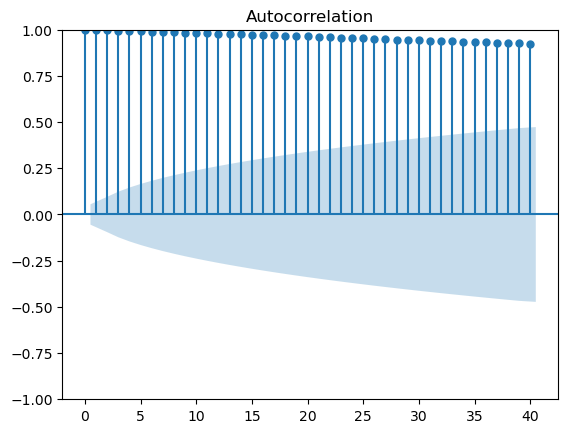

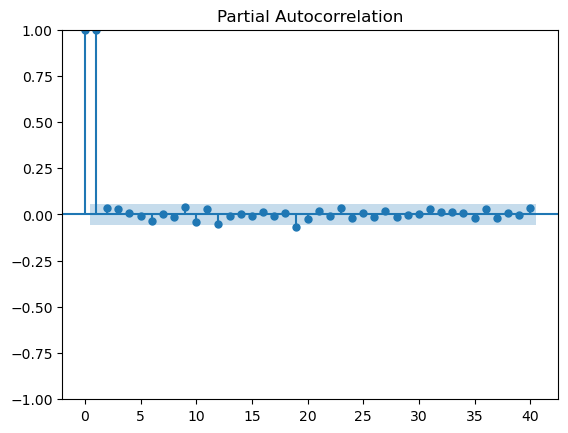

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plot_acf(data['Close'].dropna(), lags=40)
plot_pacf(data['Close'].dropna(), lags=40)
plt.show()


The plots can guide your choice of p and q values for the ARIMA model. For instance, where the PACF plot cuts off (or goes into the confidence band) might be your p value.

## Error Analysis

If you have the actual values for 2022, you can use them to calculate RMSE:

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

actual_2022 = data['2022']['Close'].values
rmse = np.sqrt(mean_squared_error(actual_2022, forecast[:len(actual_2022)]))
print(f"RMSE for the 2022 forecast: {rmse}")


RMSE for the 2022 forecast: 28.314060141817727


C:\Users\alish\AppData\Local\Temp\ipykernel_19720\2245019449.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



## Conclusion

In our comprehensive analysis of Apple Inc.'s stock from 2018 to 2022, several insights emerge:

- **Price Trends**: Apple's stock demonstrated a consistent upward trend with occasional periods of volatility.
- **Moving Averages**: The 50-day and 200-day moving averages provided insights into the stock's short-term and long-term trends, respectively. When the 50-day MA is above the 200-day MA, it typically indicates a bullish trend, and vice versa.
- **Seasonality and Residuals**: The decomposition of the stock prices showed the inherent seasonality present in the stock, along with the residuals after accounting for the trend and seasonality.
- **Returns Analysis**: We assessed the daily returns to gain an understanding of the stock's volatility, which offers insights into the stock's risk profile.
- **Volatility Analysis**: Apple stock had periods of high volatility, particularly during global events or significant product launches or updates.
- **Cumulative Returns**: An investor who invested in Apple at the beginning of 2018 would have seen significant growth by the end of 2022, as evidenced by the cumulative returns.
- **Stock Comparison**: Compared to Microsoft, another tech giant, Apple showed competitive performance, though each stock has its unique patterns.
- **ARIMA Forecasting**: Our forecast for 2022 provided a projection based on historical data. While this offers a quantitative estimate, it's essential to consider other qualitative factors when making investment decisions.
- **Error Analysis**: Using the RMSE, we quantified the potential errors in our forecast, underscoring the importance of continuously refining and retraining our model.